In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
data = pd.read_csv(r"C:\Users\Nare\Downloads\Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
data['Gender'] = (data['Gender'] == 'Male' ).astype('int8')
data = data.drop('CustomerID', axis = 1)
ob = StandardScaler()
data = pd.DataFrame(ob.fit_transform(data), columns = data.columns, index = data.index)

In [7]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [12]:
X = data
kmeans = KMeans(n_clusters=7, random_state=0, n_init="auto")
y_pred = kmeans.fit_predict(X)

In [14]:
centers = kmeans.cluster_centers_

In [16]:
wcss = []

for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    

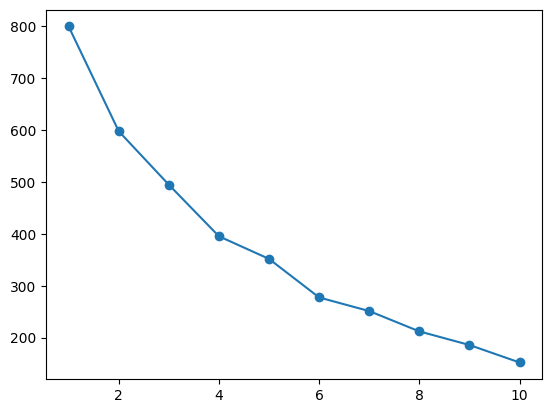

In [17]:
plt.plot(range(1, 11), wcss, marker='o')

In [21]:
sklearn_score = silhouette_score(X, y_pred)

In [22]:
sklearn_score

0.340127033719064